In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
import BudykoSellers

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Examples of running Budyko-Sellers Model

#### Constants

In [83]:
# Initialize dictionaries
grid, params, init, const, time = {}, {}, {}, {}, {}

# Set Constants
const['earth_radius'] = 6.373e6 # Earth's radius [m]
const['rho_w'] = 1e3 # Water density [kg m-3]
const['cp_w'] = 4e3 # Water specific heat capacity [J kg-1 K-1]

### 1. Three-box model w/ different feedbacks/heat capacities, no diffusion (uncoupled)

In [84]:
grid['stag_lats'] = np.arange(-90, 91, 36)              # Vector of staggered latitudes [degrees]
grid['dz_slabs'] = np.array([1500, 10, 150, 10, 1500])  # Water slabs thickness [m]

params['ASRf'] = 0                                      # Select shortwave radiation scheme [Daily insolation/No SW/linear]
params['A'] = 0                                         # Intercept in OLR calculation, used for climatology [W m-2]

init['T0'] = 0                                          # Initial temperature [K]

params['D'] = 0                                         # Horizontal diffusivity [W m-2 K-1]
params['B'] = np.array([0.67, 0.86, 2.0, 0.86, 0.67])   # Feedback parameters [W m-2 K-1]
params['K'] = 0                                         # Vertical diffusivity [W m-2 K-1]
params['force_flag'] = 0                                # Select which type of forcing [Constant, Exponential, Other]
params['reff_lw'] = 3.7                                 # Longwave forcing [W m-2]
params['reff_sw'] = 0                                   # Shortwave forcing [W m-2]

time['int_yrs'] = 250                                   # Integration time [years]
time['save_f'] = 365                                    # Save every time.save_f [days]
time['dt'] = 3600 * 6                                   # Time step [seconds]

In [85]:
grid['NL'] = len(grid['stag_lats']) - 1                                         # Number of regions
grid['lats'] = 0.5 * (grid['stag_lats'][1:] + grid['stag_lats'][0:-1])          # Unstaggered latitudes

params['stag_z'] = np.hstack([                                                  # Water box thicknesses
    np.zeros((len(grid['dz_slabs']), 1)),
    np.array(grid['dz_slabs']).reshape(-1, 1)
])

time['NT'] = int(round((time['int_yrs'] * 3600 * 24 * 365.24) / time['dt']))    # Number of time steps
time['DS'] = int(round(time['save_f'] * 3600 * 24 / time['dt']))                # Save every time['DS']
time['NS'] = math.floor(time['NT'] / time['DS']) + 1                            # Number of save times
time['tvec_save'] = np.arange(0, time['save_f'] * time['NS'], time['save_f'])   # Vector of saved time steps

init['T'] = np.ones((grid['NL'], 1)) * init['T0']                               # Initial temperature


### 1a) Abrupt Forcing Experiment

In [64]:
out_Abrupt = BudykoSellers.SolverBudykoSellers(const, grid, params, init, time)

100%|██████████| 365239/365239 [00:12<00:00, 29653.48it/s]


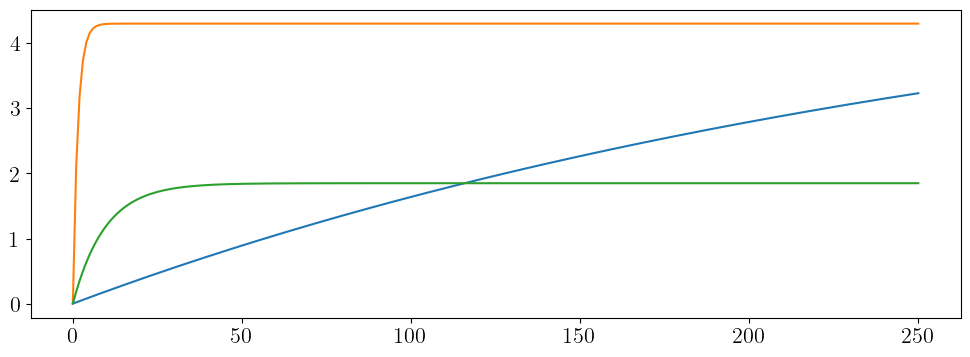

In [65]:
plt.plot(np.squeeze(out_Abrupt['T_ts']).T[:,0:3])

### 1b) Exponential Forcing Experiment

In [75]:
params['force_flag']  = 1
params['RF_end']      = 8.5 # [W m-2]
params['RF_init']     = 0.0 # [W m-2]
params['t_star']      = 50  # [years]
out_Exponential       = BudykoSellers.SolverBudykoSellers(const, grid, params, init, time)

100%|██████████| 365239/365239 [00:11<00:00, 31067.07it/s]
/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:263: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


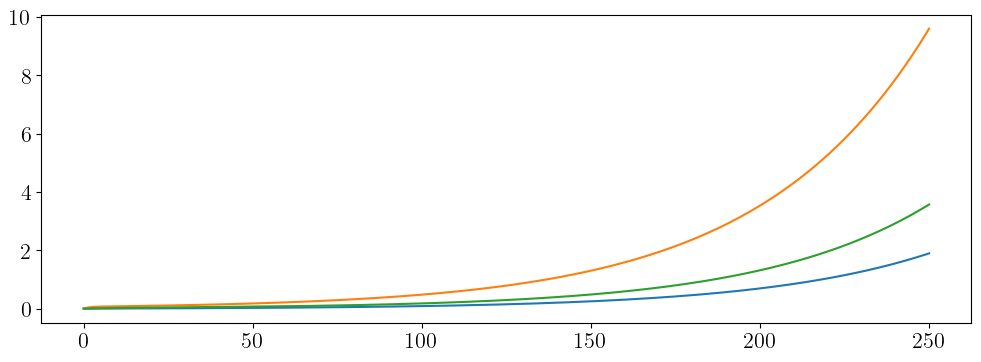

In [76]:
plt.plot(np.squeeze(out_Exponential['T_ts']).T[:,0:3])

### 2. Three-box model w/ Diffusion

#### 2a) Abrupt

In [86]:
params['force_flag']  = 0
params['D']           = 0.55
out_Diff_Abrupt       = BudykoSellers.SolverBudykoSellers(const, grid, params, init, time)

100%|██████████| 365239/365239 [00:11<00:00, 32345.95it/s]
/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:263: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


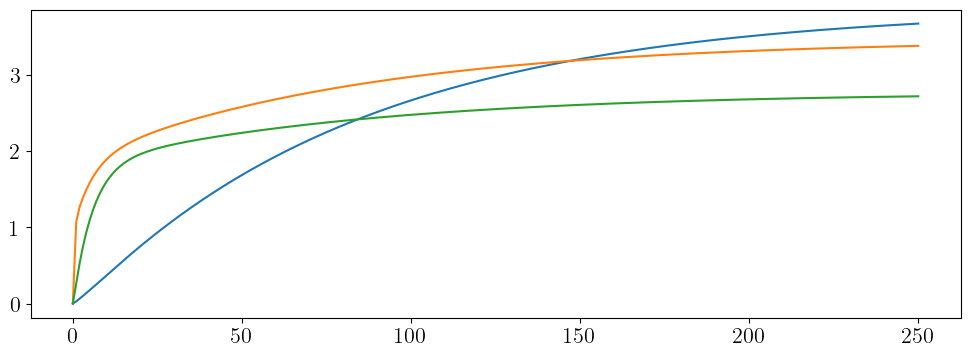

In [87]:
plt.plot(np.squeeze(out_Diff_Abrupt['T_ts']).T[:,0:3])